# Module 1: Fundamentals of ML - Intro to SciKit Learn

## Key Types of ML problems

**Supervised** ML: learn to pedict **target values** from labelled data.
- Classification (target values are discrete classes)
- Regression (target values are continuous values)


**Unsupervised** ML: finding useful structure or knowledge in data when no labels are available
- Finding clusters of similar users (clustering)
- Detecting abnormal server access patterns (unsupervised outlier detection)

### Basic ML Workflow: 
### **Representation -> Evaluation -> Optimization**

## Python Tools for ML

**1. Classical ML**
- Scikit-Learn
- Statsmodels

**2. Deep Learning Frameworks**
- TensorFlow
- Keras
- PyTorch
- JAX
- Flax
- MXNet
- Theano (legacy)

**3. Gradient Boosting/Numerical Computing**
- XGBoost
- LightGBM
- CatBoost

**4. Data Handling/Numerical Computing**
- NumPy
- Pandas
- SciPy
- Dask
- Vaex
- Polars

**5. Visualization/Plotting**
- Matplotlib
- Seaborn
- Plotly
- graphviz
- Bokeh
- Altair
- ggplot (plotnine)

**6. Natural Language Processing (NLP)**
- NLTK
- spaCy
- Gensim
- HuggingFace Transoformers
- SentenceTransformers
- fuzzywuzzy

**7. Computer Vision**
- OpenCV
- Pillow (PIL)
- scikit-image
- torchvision
- albumentations
- mediapipe

**8. Reinforcement Learning**
- Stable Baselines3
- OpenAI Gym
- RLlib

**9. Audio/Speech ML**
- Librosa
- torchaudio

**10. Explainable AI (XAI)**
- SHAP
- LIME
- Eli5

**11. Deployment/Serving**
- Flask
- FastAPI
- Streamlit
- Gradio
- ONNX Runtime
- TensorFlow Serving
- TorchServe

**12. Experiment Tracking/Monitoring**
- MLflow
- Weights & Biases (wandb)
- TensorBoard
- Neptune.ai

**13. Data Versioning/Pipelines/Orchestration**
- DVC
- Airflow
- Prefect
- Luigi

**14. Feature Engineering**
- Featuretools
- tsfresh



In [1]:
%matplotlib widget
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pathlib import Path

In [2]:
data = Path('assets') / 'fruit_data_with_colors.txt'
fruits = pd.read_table(data)
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{np.int64(1): 'apple',
 np.int64(2): 'mandarin',
 np.int64(3): 'orange',
 np.int64(4): 'lemon'}

In [4]:
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Examining the Data

In [5]:
#pd.__version__

<Figure size 640x480 with 0 Axes>

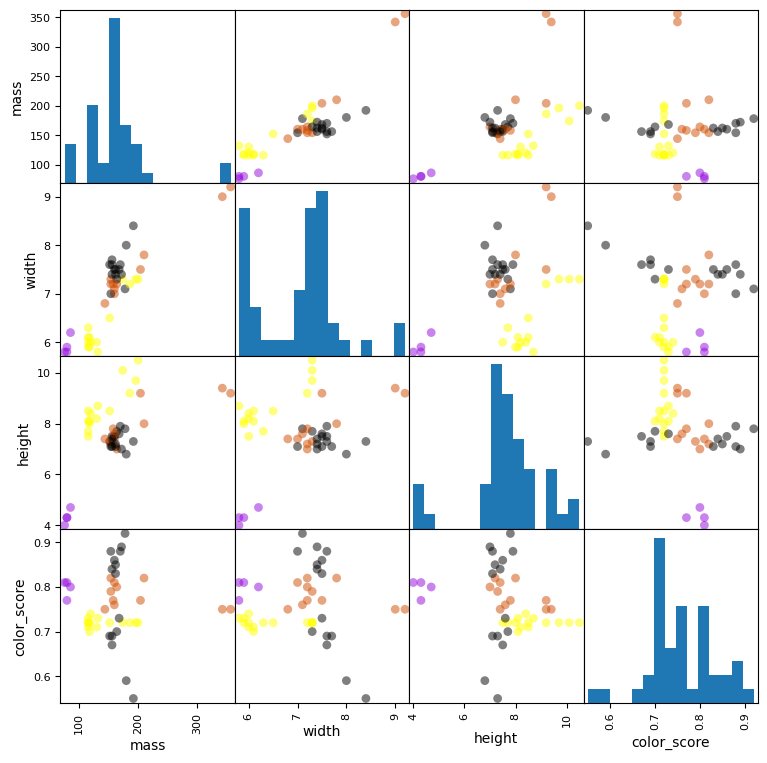

In [6]:
# plotting a scatter matrix

from matplotlib import cm

X = fruits[['height','width','mass','color_score']]
y = fruits['fruit_label']

cmap = cm.get_cmap('gnuplot')
plt.tight_layout() 
scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker= 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

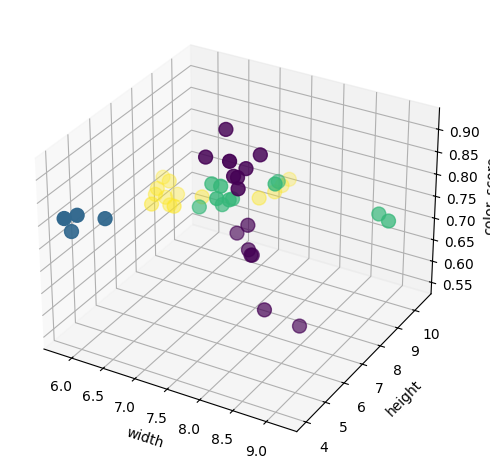

In [7]:
# 3D scatter plot

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.tight_layout() 
plt.show()

### Create train-test split

In [8]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## The k-Nearest Neighbor (k-NN) Classifier Algorithm

### Given a training set X_train w labels y_train, and given a new instance x_test to be classified:

1. find the most similar instances (X_NN) to x_test that are in X_train.
2. get the labels y_NN for the instances in X_NN
3. predict the label for x_test by combining the labels y_NN


### Create classifier object

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

### train the classifier (fit the estimator) using the training data

In [10]:
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Estimate the accuracy of the classifier on future data, using the test data

In [11]:
knn.score(X_test, y_test)

0.5333333333333333

### use the trained k-NN classifier model to classify new, previosuly unseen objects

In [12]:
# e.g. 1: a fruit w mass 20g, width 4.3 cm, height 5.5 cm

fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]] 

'mandarin'

In [13]:
# e.g. 2: a fruit w mass 100g, width 6.3 cm, height 8.5 cm

fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### plot the decision boundaries of the k-NN classifier

In [14]:
 # pure AI code
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

# X: dataframe with at least 'height' and 'width'
# y: labels (fruit_label)
def plot_fruit_knn(X, y, n_neighbors=5, weights='uniform'):
    # use only height and width for 2D decision boundary
    X_plot = X[['height', 'width']].to_numpy()
    y = y.to_numpy()

    # fit k-NN
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    knn.fit(X_plot, y)

    # make a mesh grid over the feature space
    h = 0.02  # step size
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1  # height
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1  # width
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    # predict class for each point in the grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # map labels 1..4 → indices 0..3 for colormap
    Z_plot = Z.copy()
    Z_plot[Z == 1] = 0
    Z_plot[Z == 2] = 1
    Z_plot[Z == 3] = 2
    Z_plot[Z == 4] = 3

    # background colors (apple, mandarin, orange, lemon)
    cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF', '#DDDDDD'])
    # point colors (stronger)
    cmap_bold  = ListedColormap(['#FF0000', '#00AA00', '#0000FF', '#777777'])

    plt.figure(figsize=(8, 6))

    # decision regions
    plt.contourf(xx, yy, Z_plot, cmap=cmap_light, alpha=0.7)

    # training points
    plt.scatter(
        X_plot[:, 0], X_plot[:, 1],
        c=y, cmap=cmap_bold,
        edgecolor='k',
        s=60
    )

    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')

    # legend using your lookup_fruit_name dict
    # (you already created lookup_fruit_name earlier)
    handles = []
    names = []
    unique_labels = np.sort(np.unique(y))
    for lab in unique_labels:
        handles.append(
            plt.Line2D(
                [], [], marker='o', linestyle='',
                markerfacecolor=cmap_bold(lab-1),
                markeredgecolor='k', markersize=8
            )
        )
        names.append(lookup_fruit_name[lab])
    plt.legend(handles, names, loc='upper left')

    plt.title(f'k-NN decision boundaries (k={n_neighbors}, weights={weights})')
    plt.show()

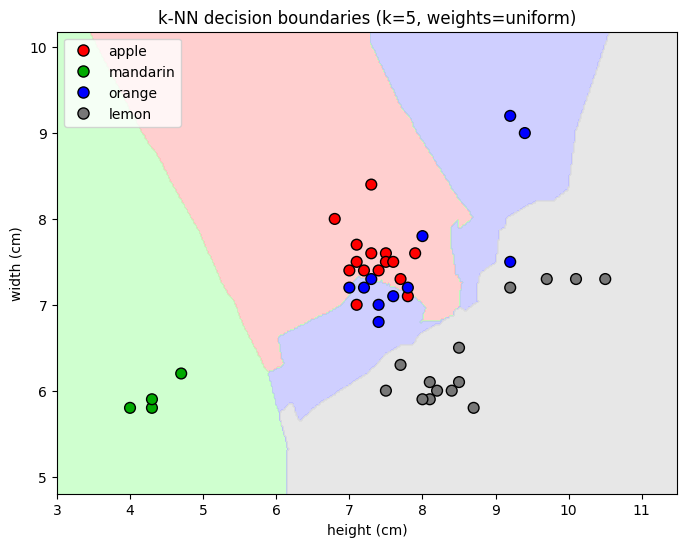

In [15]:
plot_fruit_knn(X_train, y_train, 5, 'uniform')

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

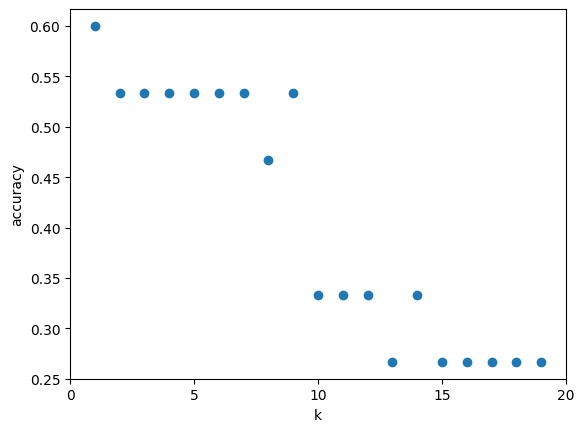

In [16]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### How sensitive is k-NN classification accuracy to the train/test split proportion?

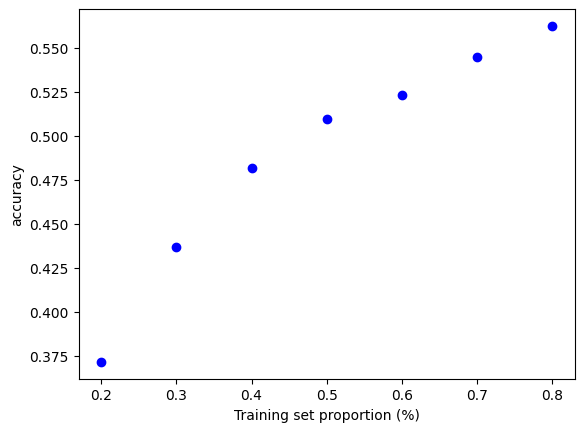

In [17]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

# Module 2: Supervised ML Part 1

## Intro to Supervised ML

#### Learning Objectives
- understand how a number of different supervised learning algorithms learn by estimating their parameters from data to make new predictions.
- understand the strengths & weaknesses of particular supervised learning methods.
- learn how to apply specific supervised ML algorithms in Python w scikit-learn.
- learn about general principles of supervised ML learning, like overfitting & how to avoid it.

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)

fruits = pd.read_table('assets/fruit_data_with_colors.txt')

# X_fruits - data instances/samples/examples & y_fruits - target value
feature_names_fruits = ['height','width','mass','color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple','mandarin','orange','lemon']

X_fruits_2D = fruits[['height', 'width']]
y_fruits_2D = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # must apply the scaling to the test set we computed for the training set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn.predict(example_fruit_scaled)[0]-1])


Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  mandarin


# Module 2: Evaluation

## Model Evaluation & Selection

#### Learning Objectives

- learn how to use a variety of evaluation metrics to evaluate supervised ML models.
- learn about choosing the right metric for selecting btwn models or for doing parameter tuning.

In [21]:
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [22]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [23]:
np.bincount(y_binary_imbalanced) 

array([1615,  182])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9955555555555555

#### Dummy Classifiers

In [26]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

In [28]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

### Confusion matrices
#### Binary (two-class) confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [30]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[376  31]
 [ 38   5]]


In [31]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  8  35]]


In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


### Evaluation metics for binary classification

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [35]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [36]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
               precision    recall  f1-score   support

       not 1       0.91      0.92      0.92       407
           1       0.14      0.12      0.13        43

    accuracy                           0.85       450
   macro avg       0.52      0.52      0.52       450
weighted avg       0.83      0.85      0.84       450

SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Logistic regression
               precision    recall  f1-score   support

       not 1       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92      0.90      0.91       450
weighted avg 

### Decision functions

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(np.int64(0), np.float64(-29.828796946464532)),
 (np.int64(0), np.float64(-19.38298923784959)),
 (np.int64(0), np.float64(-29.198171087718837)),
 (np.int64(0), np.float64(-21.7460679298762)),
 (np.int64(0), np.float64(-22.642417214717167)),
 (np.int64(0), np.float64(-11.806090909523531)),
 (np.int64(1), np.float64(6.496024930985355)),
 (np.int64(0), np.float64(-23.354510536452683)),
 (np.int64(0), np.float64(-27.54307757920344)),
 (np.int64(0), np.float64(-26.88822728842866)),
 (np.int64(0), np.float64(-31.86242808030221)),
 (np.int64(0), np.float64(-22.486178961261736)),
 (np.int64(0), np.float64(-25.31797052258861)),
 (np.int64(0), np.float64(-13.384607365858662)),
 (np.int64(0), np.float64(-13.565575164407159)),
 (np.int64(0), np.float64(-13.308453676082612)),
 (np.int64(1), np.float64(12.18062722663659)),
 (np.int64(0), np.float64(-34.3625522963456)),
 (np.int64(0), np.float64(-13.231464324678187)),
 (np.int64(0), np.float64(-29.593888653381224))]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(np.int64(0), np.float64(1.1104987763469492e-13)),
 (np.int64(0), np.float64(3.8200999808628466e-09)),
 (np.int64(0), np.float64(2.0863896273908568e-13)),
 (np.int64(0), np.float64(3.5958593383618266e-10)),
 (np.int64(0), np.float64(1.4673142884099403e-10)),
 (np.int64(0), np.float64(7.458931619992688e-06)),
 (np.int64(1), np.float64(0.9984928475757716)),
 (np.int64(0), np.float64(7.198880201881055e-11)),
 (np.int64(0), np.float64(1.0919264665421432e-12)),
 (np.int64(0), np.float64(2.101799384274476e-12)),
 (np.int64(0), np.float64(1.4531930250193217e-14)),
 (np.int64(0), np.float64(1.7154440502072342e-10)),
 (np.int64(0), np.float64(1.0105204552272602e-11)),
 (np.int64(0), np.float64(1.538644222180481e-06)),
 (np.int64(0), np.float64(1.2839408145465623e-06)),
 (np.int64(0), np.float64(1.6603944946026527e-06)),
 (np.int64(1), np.float64(0.9999948711667203)),
 (np.int64(0), np.float64(1.1927053122530233e-15)),
 (np.int64(0), np.float64(1.7932765833054262e-06)),
 (np.int64(0), np.float6

### Precision-recall curves

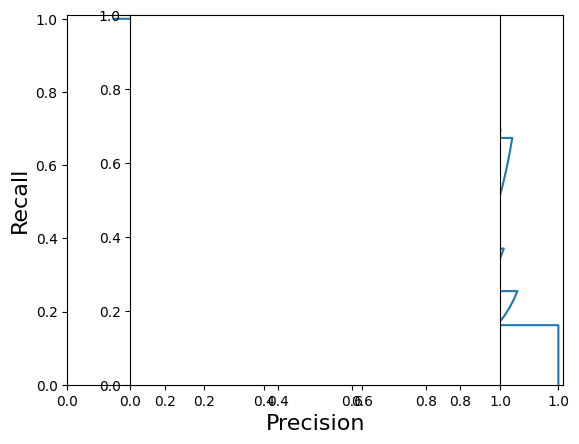

In [39]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

### ROC curves, Area-Under-Curve (AUC)

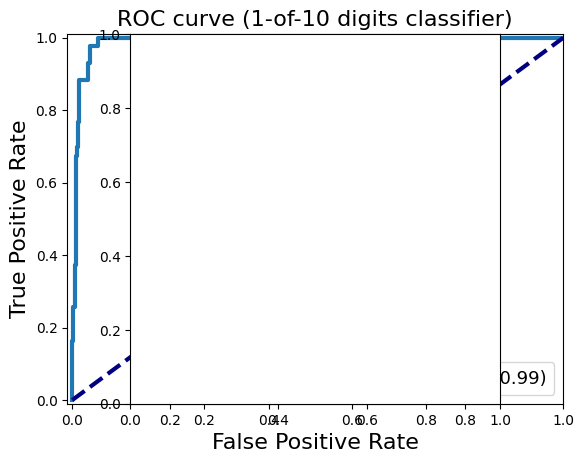

In [40]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


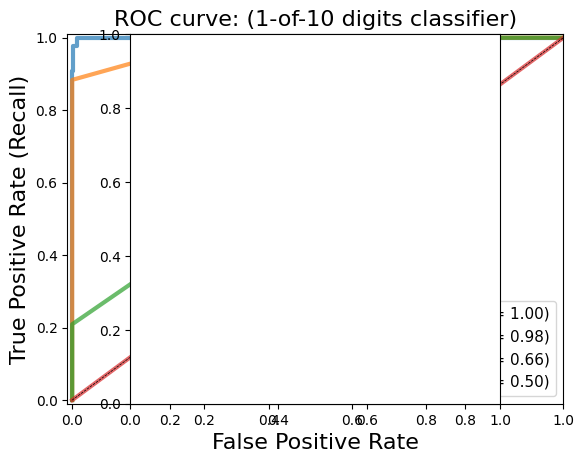

In [41]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

### Evaluation measures for multi-class classification
#### Multi-class confusion matrix

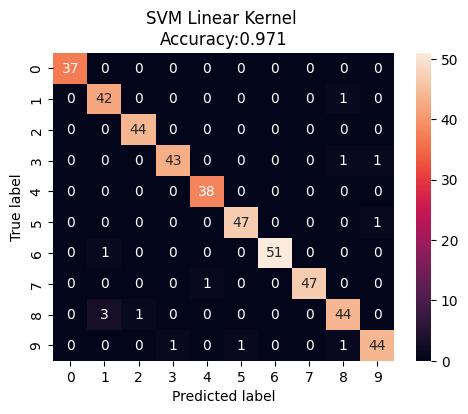

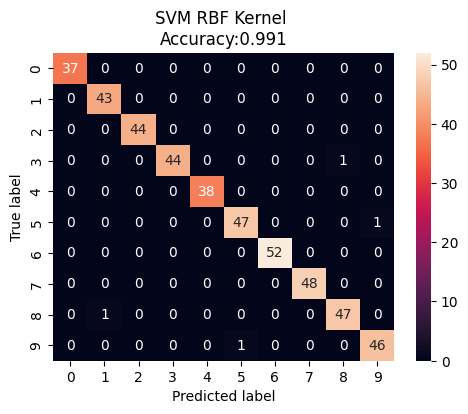

In [42]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Multi-class classification report¶

In [43]:
print(classification_report(y_test_mc, svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



#### Micro- vs. macro-averaged metrics

In [44]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged precision = 0.99 (treat instances equally)
Macro-averaged precision = 0.99 (treat classes equally)


In [45]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged f1 = 0.99 (treat instances equally)
Macro-averaged f1 = 0.99 (treat classes equally)


#### Regression evaluation metrics¶

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

Linear model, coefficients:  [-698.8]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


<IPython.core.display.Javascript object>

In [ ]:
# Plot outputs
%matplotlib widget
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show() # ???